In [1]:
import pandas as pd

SDSS_DR16 = 'SDSS_DR16_90cutoff_for_Vicky.csv'
df = pd.read_csv(SDSS_DR16)


In [2]:
import numpy as np

Types = df.loc[0:1000, 'Types']
types = Types.apply(lambda v: v.replace(
    'elliptical', '0').replace('spiral', '1')).astype(int)

X = np.array(df.loc[0:1000, 'petroMag_u':'petroMag_z'])
y = np.array(types)


In [17]:
data = X,y
data

(array([[17.35997, 15.50984, 14.68634, 14.30167, 14.01772],
        [19.1559 , 17.14306, 16.24167, 15.81783, 15.50098],
        [18.36842, 17.18698, 16.64672, 16.31816, 16.09746],
        ...,
        [20.50781, 18.54897, 17.51085, 17.01742, 16.61304],
        [18.37529, 17.27796, 16.87543, 16.66543, 16.84409],
        [19.17209, 17.89489, 17.19154, 16.78975, 16.47395]]),
 array([0, 0, 1, ..., 0, 1, 1]))

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#randon_state ไว้กำหนดให้การ split ข้อมูลแต่ล่ะครั้ง ให้หน้าตาเหมือนเดิม ที่เป็น 42 เพราะว่าเค้าใช้กัน


In [4]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

(750, 5)
(251, 5)
(750,)
(251,)


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# C = 1000000000
# gamma = 0.0001

# # RBF Kernel
# clf_rbf = Pipeline(
#     [("rbf_svc", SVC(kernel="rbf", C=C, gamma=gamma))])

# clf_fit = clf_rbf.fit(X_train, y_train)
# clf_fit


Pipeline(steps=[('rbf_svc', SVC(C=1000000000, gamma=0.0001))])

In [6]:
import pickle

# # save train-test data
# clf_save = open('clf_fix_0-1000.csv', 'wb')
# pickle.dump(clf_fit, clf_save)
# clf_save.close()


In [7]:
# load data
clf_read = open('clf_fix_0-1000.csv', 'rb')
clf = pickle.load(clf_read)
clf


Pipeline(steps=[('rbf_svc', SVC(C=1000000000, gamma=0.0001))])

In [8]:
train = clf.score(X_train, y_train)
test = clf.score(X_test, y_test)

print("Train set accuracy = " + str(train))
print("Test set accuracy = " + str(test))


Train set accuracy = 0.8506666666666667
Test set accuracy = 0.8406374501992032


0:1e5

Train set accuracy = 0.8476133333333333

Test set accuracy = 0.8494860205591777

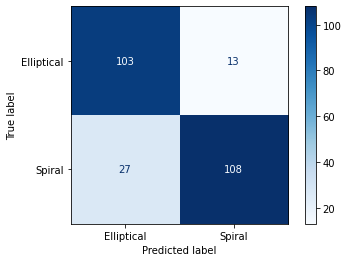

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)
cmap = 'Blues'
label_name = 'Elliptical', 'Spiral'

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap=cmap, display_labels=label_name)
    
plt.show()

In [18]:
from sklearn.inspection import permutation_importance
r = permutation_importance(clf, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

AttributeError: 'tuple' object has no attribute 'feature_names'

In [10]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(103, 13, 27, 108)

In [11]:
# Accuracy
acc = (tp+tn)/(tp+tn+fp+fn)
# True positive rate / Sensitivity / Hit rate / Recall 
tpr = tp/(tp+fn)
# True negative rate / Specificity
tnr = tn/(tn+fp)
# False positive rate / Fall out
fpr = fp/(fp+tn)
# False negative rate
fnr = fn/(fn+tp)
# Positive predictive value / Precision
ppv = tp/(tp+fp)
# Negative predictive value
npv = tn/(tn+fn)
# False discovery rate
fdr = fp/(fp+tp)

print("acc = " + str(acc))
print("tpr = " + str(tpr))
print("tnr = " + str(tnr))
print("fpr = " + str(fpr))
print("fnr = " + str(fnr))
print("ppv = " + str(ppv))
print("npv = " + str(npv))
print("fdr = " + str(fdr))

acc = 0.8406374501992032
tpr = 0.8
tnr = 0.8879310344827587
fpr = 0.11206896551724138
fnr = 0.2
ppv = 0.8925619834710744
npv = 0.7923076923076923
fdr = 0.10743801652892562


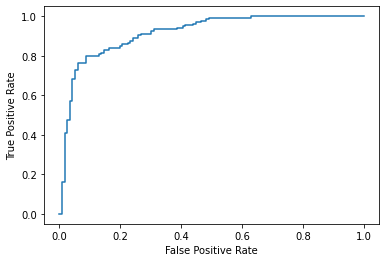

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

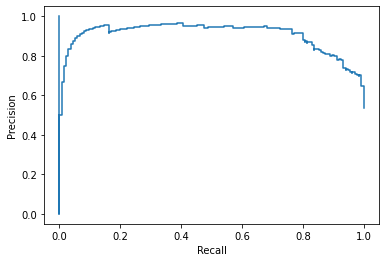

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])

pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()